In [1]:
import numpy as np
import torch


import json
from torch.utils.data import DataLoader
from torch.optim import SGD 
from torch import nn

In [2]:
import utils_generic as generic
import singletask_simple as st
import model_confs as confs


import train

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.manual_seed(27)

In [4]:
model_conf = confs.distilbert_conf

# Datos ConvAI2

In [5]:
with open('Datasets\ConvAI2\convai2_complete.json','r') as f:
    data = json.load(f)

In [6]:
convai_train = data['train']
convai_val = data['validation']



convai_train_token = generic.tokenize_dataset(convai_train,['about','to','as'],model_conf) 
convai_val_token = generic.tokenize_dataset(convai_val,['about','to','as'],model_conf) 

In [7]:
convai_train_dataset = {}
for task in ['to','as','about']:
    convai_train_dataset[task] = st.DatasetSingleTaskSimple(convai_train_token,task,eval=False)

In [8]:
convai_val_dataset = {}
for task in ['to','as','about']:
    convai_val_dataset[task] = st.DatasetSingleTaskSimple(convai_val_token,task,eval=False)

## Datos md_gender

In [9]:
with open('Datasets\md_gender\md_complete.json','r',encoding="utf8") as f:
    md_data = json.load(f)

In [10]:
md_tokenized = generic.tokenize_dataset(md_data,['about','to','as'],model_conf) 


md_dataset = {}
for task in ['to','as','about']:
    md_dataset[task] = st.DatasetSingleTaskSimple(md_tokenized,task,eval=True)

# Creación dataloaders

In [11]:
dl_train = {}
for task in ['to','as','about']:
    dl_train[task] = DataLoader(convai_train_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [12]:
dl_val = {}
for task in ['to','as','about']:
    dl_val[task] = DataLoader(convai_val_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [13]:
dl_eval = {}
for task in ['to','as','about']:
    dl_eval[task] = DataLoader(md_dataset[task],batch_size=128,shuffle=False,collate_fn=st.collate_fn)

# ABOUT

In [14]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_distilbert_ABOUT'

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
for task in ['about','to','as']:
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Using scikit learn accuracy por género en el conjunto about
GLOBAL: 0.4885204081632653
MALE 0.9973958333333334
FEMALE 0.0 

Using scikit learn accuracy por género en el conjunto to
GLOBAL: 0.5189393939393939
MALE 1.0
FEMALE 0.0 

Using scikit learn accuracy por género en el conjunto as
GLOBAL: 0.516297262059974
MALE 1.0
FEMALE 0.0 



  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6817112048951591 	 Validation loss: 0.6816308498382568 	 
  1%|          | 574/57400 [01:56<3:04:26,  5.14it/s]
Epoch 2 	 Training loss: 0.6758975176861062 	 Validation loss: 0.6730258091021393 	 
  2%|▏         | 1148/57400 [03:56<3:10:58,  4.91it/s]
Epoch 3 	 Training loss: 0.6544714012420136 	 Validation loss: 0.6283614231368243 	 
  3%|▎         | 1722/57400 [05:57<3:08:03,  4.93it/s]
Epoch 4 	 Training loss: 0.5698747286501662 	 Validation loss: 0.5007820967900551 	 
  4%|▍         | 2296/57400 [08:00<3:13:31,  4.75it/s]
Epoch 5 	 Training loss: 0.47325154266706326 	 Validation loss: 0.4344564928846844 	 
  5%|▌         | 2870/57400 [10:01<3:00:27,  5.04it/s]
Epoch 6 	 Training loss: 0.42492493852090335 	 Validation loss: 0.39405776535050346 	 
  6%|▌         | 3444/57400 [12:02<3:03:45,  4.89it/s]
Epoch 7 	 Training loss: 0.39939559336738717 	 Validation loss: 0.3753323368096756 	 
  7%|▋         | 4018/57400 [14:04<3:04:21,  4.83it/s]
Epoch 8 	 Trainin

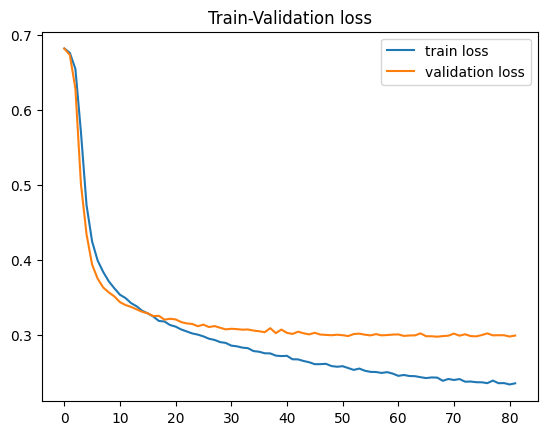

In [16]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['about'],optimizer,early_stop=10,dl_val=dl_val['about'],save_path=save_path)

In [17]:

model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
   
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using scikit learn accuracy por género en el conjunto about
GLOBAL: 0.8469387755102041
MALE 0.8463541666666666
FEMALE 0.8475 

Using scikit learn accuracy por género en el conjunto to
GLOBAL: 0.6654040404040404
MALE 0.6763990267639902
FEMALE 0.6535433070866141 

Using scikit learn accuracy por género en el conjunto as
GLOBAL: 0.6753585397653195
MALE 0.6590909090909091
FEMALE 0.692722371967655 



# TO

In [14]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_distilbert_TO'

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6946276275746083 	 Validation loss: 0.6922617049540504 	 
  1%|          | 574/57400 [02:04<3:09:40,  4.99it/s]
Epoch 2 	 Training loss: 0.6944033790133141 	 Validation loss: 0.693892678972018 	 

1 epoch without improvement
  2%|▏         | 1148/57400 [04:02<3:16:50,  4.76it/s]
Epoch 3 	 Training loss: 0.6939664893241709 	 Validation loss: 0.6937246393349211 	 

2 epoch without improvement
  3%|▎         | 1722/57400 [06:01<3:02:05,  5.10it/s]
Epoch 4 	 Training loss: 0.6940685151346054 	 Validation loss: 0.6933761885610678 	 

3 epoch without improvement
  4%|▍         | 2296/57400 [08:01<3:11:48,  4.79it/s]
Epoch 5 	 Training loss: 0.6939466834483662 	 Validation loss: 0.6935938364368374 	 

4 epoch without improvement
  5%|▌         | 2870/57400 [10:02<3:36:17,  4.20it/s]
Epoch 6 	 Training loss: 0.6939515924204517 	 Validation loss: 0.6929537098286516 	 
  6%|▌         | 3444/57400 [12:04<3:02:38,  4.92it/s]
Epoch 7 	 Training loss: 0.69396902449455 	 Va

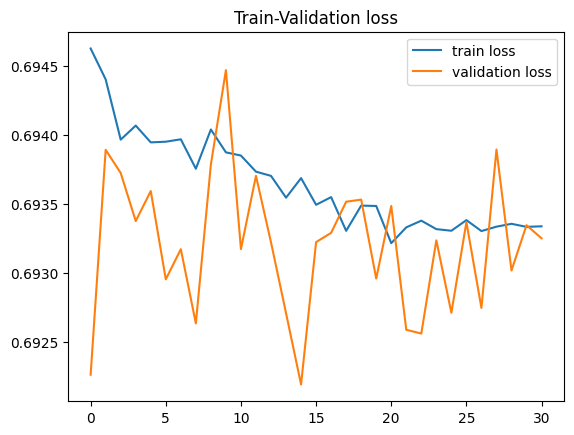

In [15]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['to'],optimizer,early_stop=10,dl_val=dl_val['to'],save_path=save_path)

In [20]:
model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GLOBAL: 0.6721938775510204 

Using scikit learn accuracy por género en el conjunto about
MALE 0.5130208333333334
FEMALE 0.825 

GLOBAL: 0.6073232323232324 

Using scikit learn accuracy por género en el conjunto to
MALE 0.48661800486618007
FEMALE 0.7375328083989501 

GLOBAL: 0.6049543676662321 

Using scikit learn accuracy por género en el conjunto as
MALE 0.4090909090909091
FEMALE 0.8140161725067385 



# AS

In [16]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_distilbert_AS'

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

GLOBAL: 0.4897959183673469 

Using scikit learn accuracy por género en el conjunto about
MALE 1.0
FEMALE 0.0 

GLOBAL: 0.5189393939393939 

Using scikit learn accuracy por género en el conjunto to
MALE 1.0
FEMALE 0.0 

GLOBAL: 0.516297262059974 

Using scikit learn accuracy por género en el conjunto as
MALE 1.0
FEMALE 0.0 



  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6961090638454783 	 Validation loss: 0.6936873500630006 	 
  1%|          | 574/57400 [02:00<3:04:49,  5.12it/s]
Epoch 2 	 Training loss: 0.6948259084482227 	 Validation loss: 0.6933554916058556 	 
  2%|▏         | 1148/57400 [03:59<3:03:45,  5.10it/s]
Epoch 3 	 Training loss: 0.6940946155308846 	 Validation loss: 0.6935936545921584 	 
  3%|▎         | 1722/57400 [05:56<2:30:43,  6.16it/s]
Epoch 4 	 Training loss: 0.6938443077981264 	 Validation loss: 0.6939760931467606 	 
  4%|▍         | 2296/57400 [07:54<2:41:38,  5.68it/s]
Epoch 5 	 Training loss: 0.6938412246596107 	 Validation loss: 0.6923265952174946 	 
  5%|▌         | 2870/57400 [09:53<3:02:41,  4.97it/s]
Epoch 6 	 Training loss: 0.6932712497403812 	 Validation loss: 0.69339485188662 	 

1 epoch without improvement
  6%|▌         | 3444/57400 [11:54<2:31:09,  5.95it/s]
Epoch 7 	 Training loss: 0.6930937581153697 	 Validation loss: 0.6936303205409292 	 

2 epoch without improvement
  7%|▋         | 401

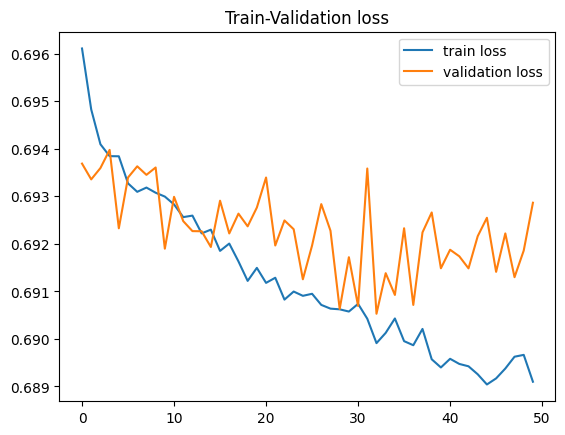

In [18]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['as'],optimizer,early_stop=10,dl_val=dl_val['as'],save_path=save_path)

In [19]:
model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GLOBAL: 0.6721938775510204 

Using scikit learn accuracy por género en el conjunto about
MALE 0.5130208333333334
FEMALE 0.825 

GLOBAL: 0.6073232323232324 

Using scikit learn accuracy por género en el conjunto to
MALE 0.48661800486618007
FEMALE 0.7375328083989501 

GLOBAL: 0.6049543676662321 

Using scikit learn accuracy por género en el conjunto as
MALE 0.4090909090909091
FEMALE 0.8140161725067385 

